In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline 


orders = pd.read_csv('Orders.csv') 
returns = pd.read_csv('Returns.csv')

In [2]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [3]:
#conversions for all the columns  

profits = orders['Profit'].str.replace('$', '').str.replace(',','') 
orders['Profit'] = [float(x) for x in profits] 
sales = orders['Sales'].str.replace('$', '').str.replace(',','')
orders['Sales'] = [float(x) for x in sales] 
orders.columns = orders.columns.str.replace(".", "_")
orders['Order_Date'] = pd.to_datetime(orders['Order_Date']) 
orders['Ship_Date'] = pd.to_datetime(orders['Order_Date'])

orders.head()


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Postal_Code,City,...,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-11,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-05,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-17,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-28,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-05,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


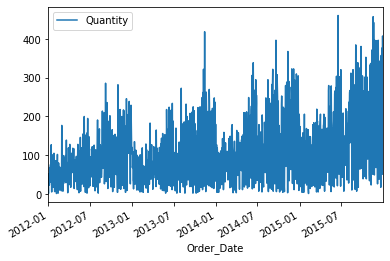

In [8]:
#problem 2 part 1 

orders.groupby('Order_Date', as_index = False).agg('sum').plot('Order_Date', 'Quantity')

In [5]:
#problem 2 
import plotly.express as px

fig = px.bar(orders.sort_values(by='Order_Date'), x="Order_Date", y="Quantity") 

#fig 

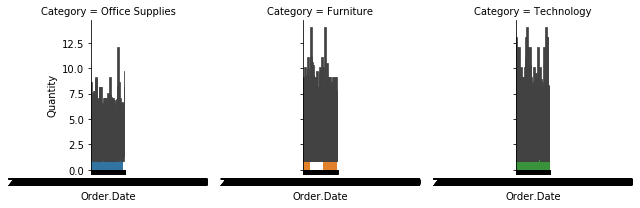

In [7]:
#Orders_time = orders.sort_values(by='Order.Date')

#plotgrid = sns.FacetGrid(orders_time, col = 'Category', hue = 'Category') 
#plotgrid.map(sns.barplot,'Order.Date','Quantity')

In [10]:
office_supplies = orders.loc[orders.Category == 'Office Supplies'] 
furniture = orders.loc[orders.Category == 'Furniture'] 
tech = orders.loc[orders.Category == 'Technology'] 

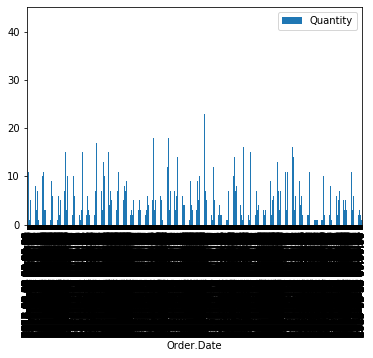

In [21]:
#office_supplies plot REVISIT LOOK AT PLOTLY   

sups = supplies.groupby(['Order.ID','Order.Date'], as_index=False).agg('sum')
fig2 = px.bar(sups.sort_values(by='Order.Date'), x="Order.Date", y="Quantity")
#sups


#group = office_supplies.groupby(['Order.ID', 'Order.Date'], as_index=False).agg('sum') 
#group.plot.bar('Order.Date', 'Quantity') 
#group.head()

In [22]:
#Problem 3  
returns 


,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania
...,...,...,...
1074,Yes,IN-2014-DA1345058-41769,Southern Asia
1075,Yes,US-2013-HG14845140-41530,Eastern US
1076,Yes,US-2013-SJ2021582-41543,Central America
1077,Yes,CA-2015-EB13870140-42269,Eastern US


In [28]:
#returns.columns.str.replace(" ", ".") 

returns.columns = ['Returned','Order_ID', 'Region']

returns.head()

,Returned,Order.ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [30]:
df = pd.merge(orders, returns, how = 'inner', on = "Order_ID")

In [33]:
#df.head
df

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,Region_y
0,30191,IN-2012-PB19210127-41259,2012-12-16,2012-12-16,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,Tables,"Lesro Conference Table, with Bottom Storage",1715.16,2,0.0,720.36,725.570,Critical,Yes,Eastern Asia
1,30190,IN-2012-PB19210127-41259,2012-12-16,2012-12-16,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,Bookcases,"Safco Classic Bookcase, Pine",2197.50,5,0.0,153.75,627.270,Critical,Yes,Eastern Asia
2,30187,IN-2012-PB19210127-41259,2012-12-16,2012-12-16,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,Tables,"Lesro Round Table, with Bottom Storage",1356.03,3,0.0,311.85,458.970,Critical,Yes,Eastern Asia
3,30193,IN-2012-PB19210127-41259,2012-12-16,2012-12-16,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,Chairs,"Office Star Swivel Stool, Adjustable",882.15,5,0.0,114.60,203.920,Critical,Yes,Eastern Asia
4,30189,IN-2012-PB19210127-41259,2012-12-16,2012-12-16,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,Machines,"Okidata Calculator, Red",148.32,3,0.0,68.22,25.480,Critical,Yes,Eastern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,35040,CA-2014-WB21850140-41654,2014-01-15,2014-01-15,Standard Class,WB-218501406,William Brown,Consumer,10011.0,New York City,...,Binders,"Square Ring Data Binders, Rigid 75 Pt. Covers,...",49.54,3,0.2,17.34,2.670,Medium,Yes,Eastern US
2216,35038,CA-2014-WB21850140-41654,2014-01-15,2014-01-15,Standard Class,WB-218501406,William Brown,Consumer,10011.0,New York City,...,Envelopes,"#10 Gummed Flap White Envelopes, 100/Box",16.52,4,0.0,7.60,1.690,Medium,Yes,Eastern US
2217,25,US-2013-SJ2021582-41543,2013-09-26,2013-09-26,First Class,SJ-2021582,Sarah Jordon,Consumer,NaN,Hermosillo,...,Furnishings,"Deflect-O Clock, Black",181.12,9,0.4,-75.56,1.085,Medium,Yes,Central America
2218,36974,CA-2012-ZC21910140-41271,2012-12-28,2012-12-28,Standard Class,ZC-219101402,Zuschuss Carroll,Consumer,60610.0,Chicago,...,Furnishings,Tenex Chairmats For Use with Hard Floors,38.98,3,0.6,-50.67,5.290,Low,Yes,Central US


In [40]:
#Extracting the years 
def getyear(dt):
    return dt.year


df['years'] = df['Order.Date'].apply(getyear)
df.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,Region_y,years
0,30191,IN-2012-PB19210127-41259,2012-12-16,2012-12-16,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,"Lesro Conference Table, with Bottom Storage",1715.16,2,0.0,720.36,725.57,Critical,Yes,Eastern Asia,2012
1,30190,IN-2012-PB19210127-41259,2012-12-16,2012-12-16,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,"Safco Classic Bookcase, Pine",2197.50,5,0.0,153.75,627.27,Critical,Yes,Eastern Asia,2012
2,30187,IN-2012-PB19210127-41259,2012-12-16,2012-12-16,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,"Lesro Round Table, with Bottom Storage",1356.03,3,0.0,311.85,458.97,Critical,Yes,Eastern Asia,2012
3,30193,IN-2012-PB19210127-41259,2012-12-16,2012-12-16,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,"Office Star Swivel Stool, Adjustable",882.15,5,0.0,114.60,203.92,Critical,Yes,Eastern Asia,2012
4,30189,IN-2012-PB19210127-41259,2012-12-16,2012-12-16,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,"Okidata Calculator, Red",148.32,3,0.0,68.22,25.48,Critical,Yes,Eastern Asia,2012


In [42]:
#Table of losses in profit by year 
#presumably if an item was returned, the profit made on the item is 0, so to determine how much was lost in profits, summed the profits column 

df.groupby('years', as_index=False).agg('sum') 

,years,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost
0,2012,11019108,5512777.0,111935.81,1457,66.968,17477.26,12636.185
1,2013,10678896,5025481.0,96575.21,1508,66.860,9269.89,11137.672
2,2014,15493169,7994617.0,133737.41,2096,81.714,17510.63,15856.426
3,2015,19394127,7911427.0,183683.98,2614,110.986,17112.97,21212.313


In [43]:
df 

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,Region_y,years
0,30191,IN-2012-PB19210127-41259,2012-12-16,2012-12-16,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,"Lesro Conference Table, with Bottom Storage",1715.16,2,0.0,720.36,725.570,Critical,Yes,Eastern Asia,2012
1,30190,IN-2012-PB19210127-41259,2012-12-16,2012-12-16,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,"Safco Classic Bookcase, Pine",2197.50,5,0.0,153.75,627.270,Critical,Yes,Eastern Asia,2012
2,30187,IN-2012-PB19210127-41259,2012-12-16,2012-12-16,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,"Lesro Round Table, with Bottom Storage",1356.03,3,0.0,311.85,458.970,Critical,Yes,Eastern Asia,2012
3,30193,IN-2012-PB19210127-41259,2012-12-16,2012-12-16,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,"Office Star Swivel Stool, Adjustable",882.15,5,0.0,114.60,203.920,Critical,Yes,Eastern Asia,2012
4,30189,IN-2012-PB19210127-41259,2012-12-16,2012-12-16,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,"Okidata Calculator, Red",148.32,3,0.0,68.22,25.480,Critical,Yes,Eastern Asia,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,35040,CA-2014-WB21850140-41654,2014-01-15,2014-01-15,Standard Class,WB-218501406,William Brown,Consumer,10011.0,New York City,...,"Square Ring Data Binders, Rigid 75 Pt. Covers,...",49.54,3,0.2,17.34,2.670,Medium,Yes,Eastern US,2014
2216,35038,CA-2014-WB21850140-41654,2014-01-15,2014-01-15,Standard Class,WB-218501406,William Brown,Consumer,10011.0,New York City,...,"#10 Gummed Flap White Envelopes, 100/Box",16.52,4,0.0,7.60,1.690,Medium,Yes,Eastern US,2014
2217,25,US-2013-SJ2021582-41543,2013-09-26,2013-09-26,First Class,SJ-2021582,Sarah Jordon,Consumer,NaN,Hermosillo,...,"Deflect-O Clock, Black",181.12,9,0.4,-75.56,1.085,Medium,Yes,Central America,2013
2218,36974,CA-2012-ZC21910140-41271,2012-12-28,2012-12-28,Standard Class,ZC-219101402,Zuschuss Carroll,Consumer,60610.0,Chicago,...,Tenex Chairmats For Use with Hard Floors,38.98,3,0.6,-50.67,5.290,Low,Yes,Central US,2012


In [60]:
#how many customers returned more than once 

group = df.groupby('Customer.ID', as_index = False).agg('count')

group.columns = group.columns.str.replace(".", "_") 

group.loc[group.Customer_Name > 1]

,Customer_ID,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Postal_Code,City,...,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Returned,Region_y,years
2,AA-1064559,3,3,3,3,3,3,3,0,3,...,3,3,3,3,3,3,3,3,3,3
5,AB-1001527,2,2,2,2,2,2,2,0,2,...,2,2,2,2,2,2,2,2,2,2
6,AB-10105101,3,3,3,3,3,3,3,0,3,...,3,3,3,3,3,3,3,3,3,3
8,AB-10165139,2,2,2,2,2,2,2,0,2,...,2,2,2,2,2,2,2,2,2,2
9,AB-1016545,6,6,6,6,6,6,6,0,6,...,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,VD-2167059,2,2,2,2,2,2,2,0,2,...,2,2,2,2,2,2,2,2,2,2
1046,VF-2171527,4,4,4,4,4,4,4,0,4,...,4,4,4,4,4,4,4,4,4,4
1049,VM-218351404,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1050,VM-2183551,3,3,3,3,3,3,3,0,3,...,3,3,3,3,3,3,3,3,3,3
